# Total Cases, Deaths and Recovery of/from COVID-19

In [2]:
import pandas as pd
import os


# reading the csv file
data = pd.read_csv('Data/covid_19_clean_complete.csv')

# summing the columns
cases = data['Confirmed'].sum()
deaths = data['Deaths'].sum()
recovered = data['Recovered'].sum()

# printing the results
print(f'Total cases of COVID-19: {cases}')
print(f'Total deaths from COVID-19: {deaths}')
print(f'Total recoveries from COVID-19: {recovered}')


Total cases of COVID-19: 828508482
Total deaths from COVID-19: 43384903
Total recoveries from COVID-19: 388408229


# 5 Most Contaminated Countries in 2020

In [4]:
# importing another .csv file
data2 = pd.read_csv('Data/worldometer_data.csv')

# creating lists
cases = data2['TotalCases'].tolist()
countries = data2['Country/Region'].tolist()

# creating a dictionary
dt = pd.DataFrame({
    'Cases (in 2020)' : cases,
    'Countries' : countries   
})

# grouping the columns
group = dt.groupby('Countries')['Cases (in 2020)'].sum().reset_index().set_index('Countries')

# printing the result
print(group.sort_values('Cases (in 2020)', ascending = False).head(5))

              Cases (in 2020)
Countries                    
USA                   5032179
Brazil                2917562
India                 2025409
Russia                 871894
South Africa           538184


# Data From Brazil (2020)

In [5]:
# getting the data for Brazil only
brazil = data2[data2['Country/Region'].str.contains('Brazil')]

# deleting unwanted columns
brazil = brazil.drop(columns = ['Continent', 'NewRecovered', 'Tot Cases/1M pop', 'Deaths/1M pop', 'NewDeaths', 'NewCases', 'WHO Region', 'Tests/1M pop', 'TotalTests', 'ActiveCases', 'Serious,Critical'])

# printing the results
print(brazil)

# percentage of the population infected
# storing the values in variables
population_br = brazil['Population']
cases_br = brazil['TotalCases']

# calculating and printing the percentage of infected
perc_cases_br = (cases_br / population_br) * 100
print(f'\nPercentage of the population infected: {perc_cases_br.values[0]:.3f}%') # using .values[0] to show only the wanted number. It stores the variable in a list and than shows the first one ([0]). Done that because the code was showing the number aproximation and the variable type (float64)

# storing the total deaths from Brazil
deaths_br = brazil['TotalDeaths']

# calculating and printing the percentage of deaths
perc_deaths_br = (deaths_br / cases_br) * 100
print(f'Percentage of fatalities: {perc_deaths_br.values[0]:.3f}%')

  Country/Region   Population  TotalCases  TotalDeaths  TotalRecovered
1         Brazil  212710692.0     2917562      98644.0       2047660.0

Percentage of the population infected: 1.372%
Percentage of fatalities: 3.381%


# Graph of Brazil Daily Infections Until July 2020

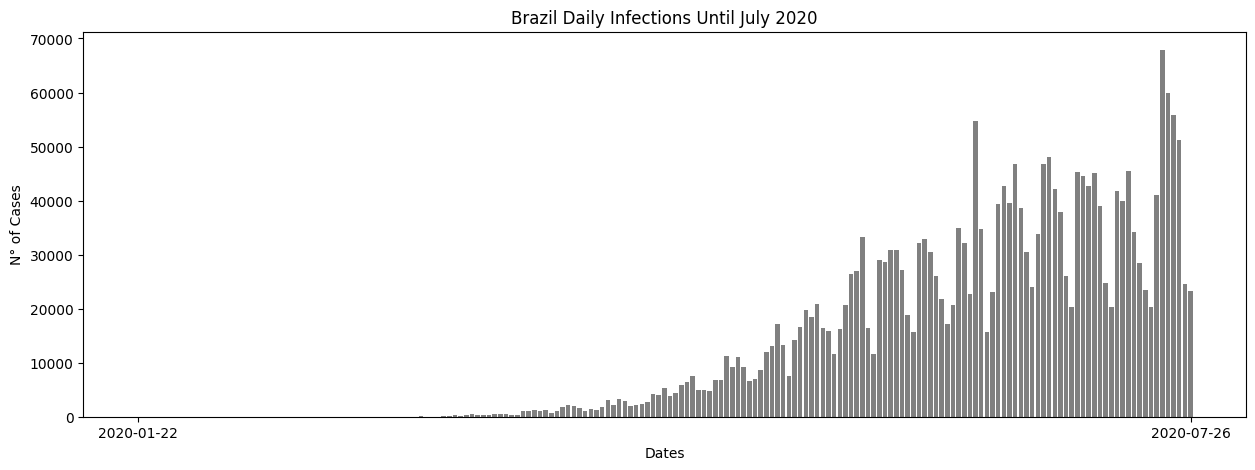

In [41]:
import matplotlib.pyplot as plt


# geting Brazil information
brazil_daily = data[data['Country/Region'].str.contains('Brazil')]

# storing the cases in a list
cases_list_br = brazil_daily['Confirmed'].tolist()

# subtracting the values to find only the daily infections
cases_list_br = [y - x for x, y in zip(cases_list_br, cases_list_br[1:])]

# removing the last element of the 'Date' column so it does not interfere with the plot
dates_br = brazil_daily['Date'].tolist()  #creating a list with the dates
dates_br = dates_br[:-1] # removing the last element of the list
 
plt.figure(figsize = (15,5))
# creating a bar graph
plt.bar(dates_br, cases_list_br, color = 'grey') #using the created list to plot the graph

# setting the x axis labels
plt.xticks([dates_br[0], dates_br[-1]], visible = True)

# labelling the axes
plt.xlabel('Dates')
plt.ylabel('N° of Cases')

# graph title
plt.title('Brazil Daily Infections Until July 2020')

# showing the graph
plt.show()
